In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=False)
# please show all columns
pd.set_option("display.max_columns", 60)


In [3]:
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements.'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [4]:
dftts = pd.read_csv('../local/data/LBNL_openpv_tts_data/ttsclean20180119.csv',
                    parse_dates=['install_date'],
                    index_col='row_id',
                    encoding = 'utf-8', 
                    dtype={'zipcode' : np.object})
dftts.head()

,file_row,data_provider,sysid_dp,sysid_tts,install_date,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
row_id,,,,,,,,,,,,,,,,,,,,,
1,10108220,California Public Utilities Commission (Curren...,PGE-INT-11328 & CA_ERP_24698,CA-NEM-12257,1998-01-09,2.2824,24500.00,False,RES,False,False,False,False,94107.0,San Francisco,San Francisco,CA,False,False,False,10.734315
2,10107162,California Public Utilities Commission (Curren...,PGE-INT-11220 & CA_ERP_24687,CA-NEM-11180,1998-01-30,1.8504,20555.54,False,RES,False,False,False,False,95949.0,Nevada City,Nevada,CA,False,False,False,11.108701
4,10107618,California Public Utilities Commission (Curren...,PGE-INT-11268 & CA_ERP_24540,CA-NEM-11641,1998-02-04,2.3076,20000.00,False,RES,False,False,False,False,94518.0,Concord,Contra Costa,CA,False,False,False,8.667013
6,10107745,California Public Utilities Commission (Curren...,PGE-INT-11280 & CA_ERP_24429,CA-NEM-11770,1998-04-03,2.3316,30941.00,False,RES,False,False,False,False,94038.0,Moss Beach,San Mateo,CA,False,False,False,13.270286
7,10107787,California Public Utilities Commission (Curren...,PGE-INT-11284 & CA_ERP_24701,CA-NEM-11812,1998-04-30,0.9300,13629.00,False,RES,False,False,False,False,94563.0,Orinda,Contra Costa,CA,False,False,False,14.654839


In [5]:
dftts.describe()

,file_row,size_kw,price,cost_per_watt
count,7.865800e+05,7.865800e+05,7.865800e+05,7.865800e+05
mean,1.376065e+07,1.103484e+01,3.538467e+05,7.111638e+10
std,4.685861e+06,6.927191e+01,2.504812e+08,6.307265e+13
min,1.000000e+07,9.768000e-16,1.000000e-02,2.184503e-09
25%,1.029881e+07,4.080000e+00,1.942865e+04,3.993870e+00
50%,1.055057e+07,5.870000e+00,2.795520e+04,4.920000e+00
75%,2.011833e+07,8.250000e+00,3.989269e+04,5.817021e+00
max,2.039491e+07,7.569000e+03,2.220000e+11,5.593872e+16


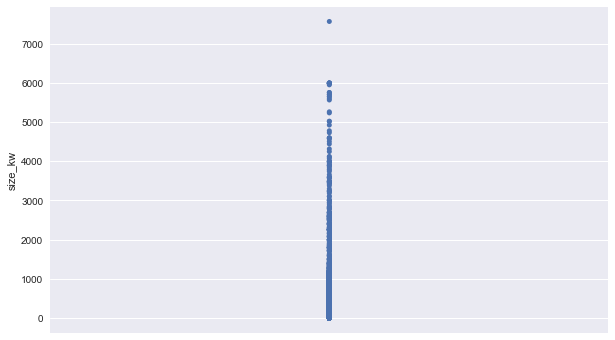

In [6]:
sns.stripplot(y= dftts["size_kw"], data=dftts)
plt.ylabel('size_kw')
plt.show()

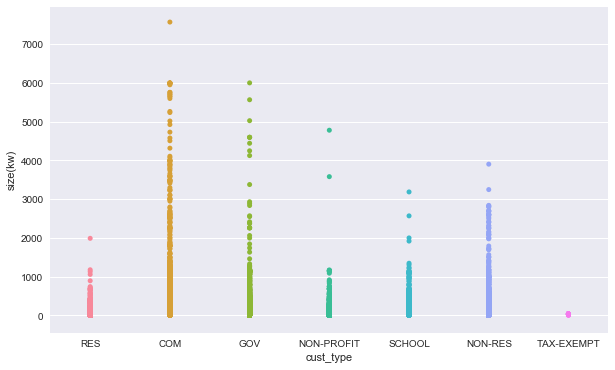

In [7]:
sns.stripplot(x='cust_type', y='size_kw', data=dftts)
plt.ylabel('size(kw)')
plt.show()

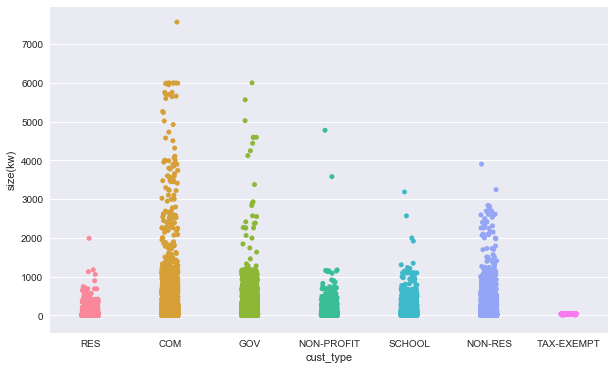

In [8]:
sns.stripplot(x='cust_type', y='size_kw', data=dftts, jitter=True)
plt.ylabel('size(kw)')
plt.show()

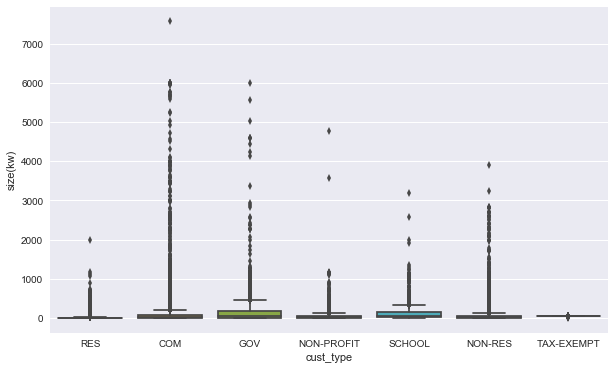

In [9]:
# everything is on the floor
sns.boxplot(x='cust_type', y='size_kw', data=dftts)
plt.ylabel('size(kw)')
plt.show()

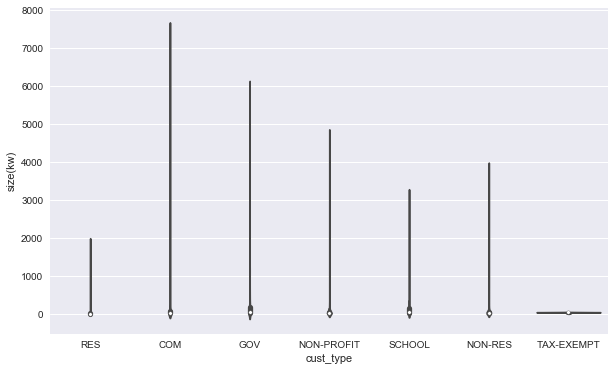

In [10]:
# same.  It's because all the data is down at sizes that aren't visible at this scale
sns.violinplot(x='cust_type', y='size_kw', data=dftts)
plt.ylabel('size(kw)')
plt.show()

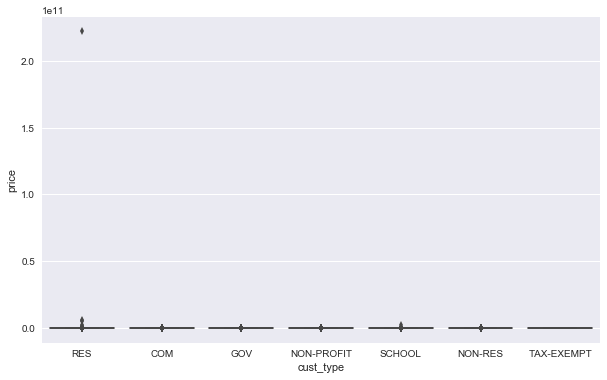

In [11]:
# anything strange there?  Yes, there is.
sns.boxplot(x='cust_type', y='price', data=dftts)
plt.ylabel('price')
plt.show()

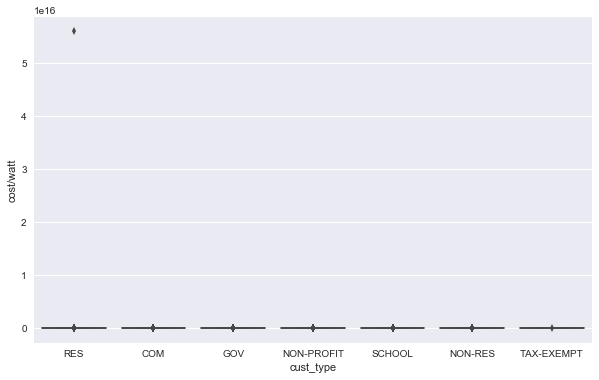

In [12]:
# check cost/watt
sns.boxplot(x='cust_type', y='cost_per_watt', data=dftts)
plt.ylabel('cost/watt')
plt.show()

__There is one wacky value for cpw (res) and one bad price (also res).  Wonder if they are the same row?__

In [13]:
# these rows are bad - price is huge, size is tiny, cpw is gigantic
dftts[dftts.cost_per_watt > 10000000]

,file_row,data_provider,sysid_dp,sysid_tts,install_date,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
row_id,,,,,,,,,,,,,,,,,,,,,
907705,10277548,California Public Utilities Commission (Curren...,PGE-INT-280367,CA-NEM-181852,2016-04-20,9.768000e-16,5.464094e+04,False,RES,False,False,False,False,93726.0,FRESNO,Fresno,CA,False,False,False,5.593872e+16
1014288,10580677,California Public Utilities Commission (Curren...,SCE-INT-SCE-76463,CA-NEM-486141,2016-09-06,3.425714e+00,2.220000e+11,False,RES,False,False,False,False,93534.0,LANCASTER,Los Angeles,CA,False,True,False,6.480400e+07


In [14]:
# are there more tiny size installs? < 10 watts
(dftts.size_kw < .01).sum()

7

In [15]:
# are there more tiny size installs? < 100 watts
(dftts.size_kw < .1).sum()

43

__I don't need any installations under 100 watt (.1 kw).  They may be typos.  In any case, they are  certainly not typical.  Deleting now.__

In [16]:
# (dftts.size_kw < .1)

In [17]:
dfLive = dftts.drop(dftts[(dftts.size_kw < .1)].index)

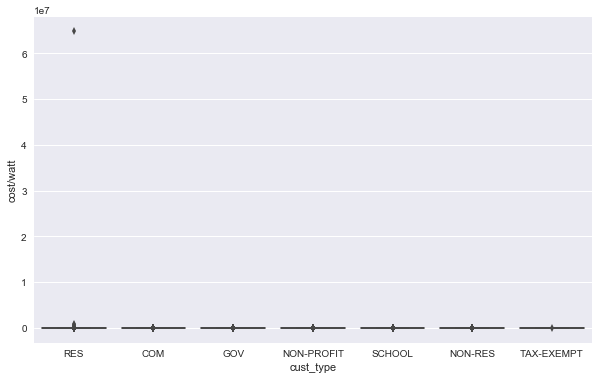

In [18]:
# should be cleaned up - still has one row with cpw 6 x 10^7???
sns.boxplot(x='cust_type', y='cost_per_watt', data=dfLive)
plt.ylabel('cost/watt')
plt.show()

In [19]:
# this should find it; it did and some others too...
dfLive[dfLive.cost_per_watt > 100000]
# these are residential rows with costs in the billions (not likely)

,file_row,data_provider,sysid_dp,sysid_tts,install_date,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
row_id,,,,,,,,,,,,,,,,,,,,,
694682,10218267,California Public Utilities Commission (Curren...,PGE-INT-220745,CA-NEM-122517,2015-08-05,5.460000,5.106846e+09,True,RES,False,False,False,False,95127.0,SAN JOSE,Santa Clara,CA,True,False,False,9.353198e+05
698110,10219339,California Public Utilities Commission (Curren...,PGE-INT-221753,CA-NEM-123590,2015-08-10,2.250000,1.152012e+09,True,RES,False,False,False,False,95209.0,STOCKTON,San Joaquin,CA,True,False,True,5.120051e+05
943219,10287163,California Public Utilities Commission (Curren...,PGE-INT-289730,CA-NEM-191479,2016-06-03,8.283000,5.596967e+09,False,RES,False,False,False,False,93625.0,FOWLER,Fresno,CA,False,True,False,6.757174e+05
1014288,10580677,California Public Utilities Commission (Curren...,SCE-INT-SCE-76463,CA-NEM-486141,2016-09-06,3.425714,2.220000e+11,False,RES,False,False,False,False,93534.0,LANCASTER,Los Angeles,CA,False,True,False,6.480400e+07
1034902,10314586,California Public Utilities Commission (Curren...,PGE-INT-321133,CA-NEM-218955,2016-10-05,10.400000,1.975001e+09,False,RES,False,False,False,False,95361.0,OAKDALE,Stanislaus,CA,True,False,True,1.899039e+05


In [20]:
# get rid of them
dfLive.drop(dfLive[dfLive.cost_per_watt > 100000].index, inplace=True)

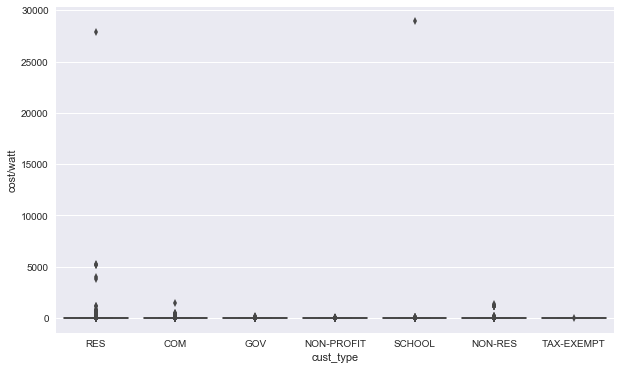

In [21]:
# should be cleaned up - not yet; still have rows with cpw > 1000
sns.boxplot(x='cust_type', y='cost_per_watt', data=dfLive)
plt.ylabel('cost/watt')
plt.show()

In [22]:
dfLive[dfLive.cost_per_watt > 1000].to_csv('cpwMT1000.csv')


In [23]:
(dfLive.cost_per_watt > 1000).sum()

19

In [24]:
# okay, bad news; these have to go.
dfLive.drop(dfLive[dfLive.cost_per_watt > 1000].index, inplace=True)

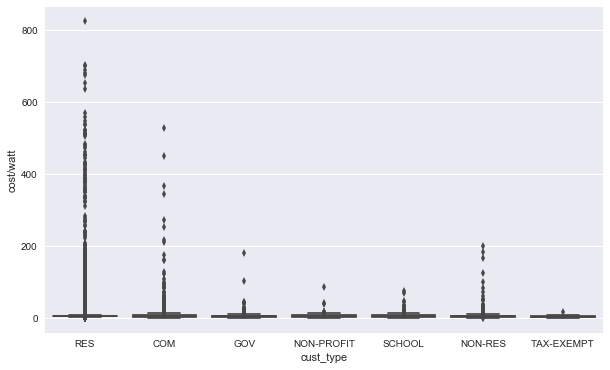

In [25]:
# should be cleaned up - boxes still on the floor
sns.boxplot(x='cust_type', y='cost_per_watt', data=dfLive)
plt.ylabel('cost/watt')
plt.show()

__It's pretty hard to belive that there is any good data with a cost_per_wat > \$100 (there are 185 left after these steps) so I'm going to get rid of all of those__.

In [26]:
(dfLive.cost_per_watt > 100).sum()

185

In [27]:
# okay, bad news; these have to go.
dfLive.drop(dfLive[dfLive.cost_per_watt > 100].index, inplace=True)

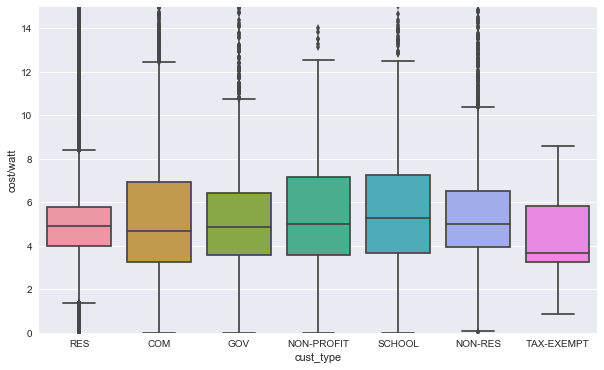

In [28]:
# should be cleaned up 
sns.boxplot(x='cust_type', y='cost_per_watt', data=dfLive)
plt.ylim(0,15)
plt.ylabel('cost/watt')
plt.show()

In [29]:
# okay, bad news; these have to go.
dfLive.drop(dfLive[dfLive.cost_per_watt > 20].index, inplace=True)

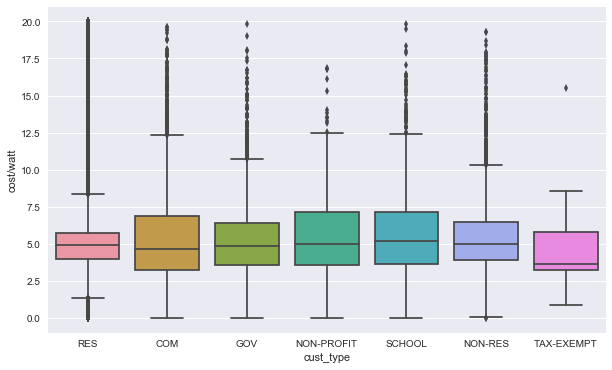

In [30]:
# should be cleaned up
sns.boxplot(x='cust_type', y='cost_per_watt', data=dfLive)
plt.ylabel('cost/watt')
plt.show()

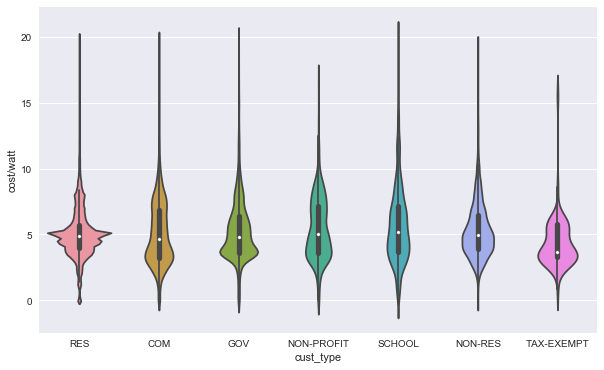

In [31]:
# ok, we are now rid of anything with cpw > 20w
sns.violinplot(x='cust_type', y='cost_per_watt', data=dfLive)
plt.ylabel('cost/watt')
plt.show()

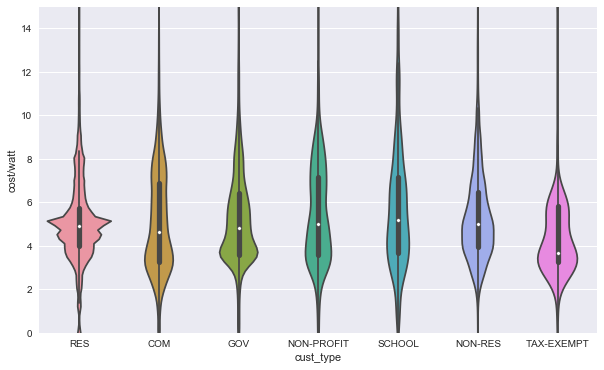

In [32]:
# adjust the vertical
sns.violinplot(x='cust_type', y='cost_per_watt', data=dfLive)
plt.ylim(0, 15)
plt.ylabel('cost/watt')
plt.show()

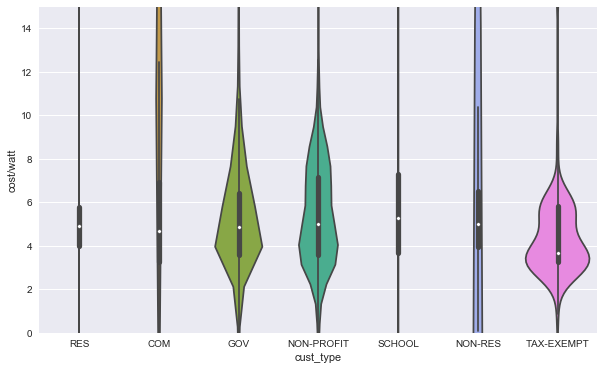

In [34]:
# this is the original data on the same axis
sns.violinplot(x='cust_type', y='cost_per_watt', data=dftts)
plt.ylim(0, 15)
plt.ylabel('cost/watt')
plt.show()

In [35]:
dfLive.shape

(785072, 21)

In [36]:
dftts.shape

(786580, 21)

__didn't lose much data at all (about 1.5k rows)__

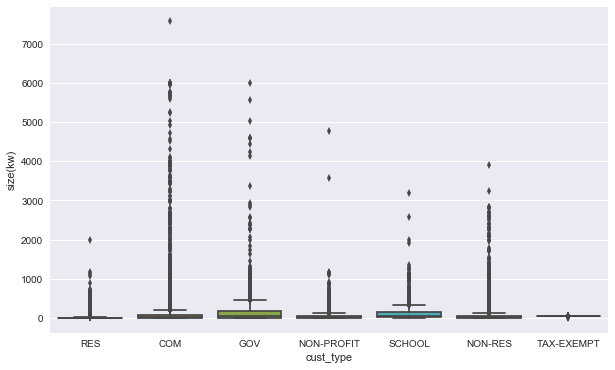

In [37]:
# so the residential installations are quite a bit smaller than the other categories
sns.boxplot(x='cust_type', y='size_kw', data=dfLive)
plt.ylabel('size(kw)')
plt.show()

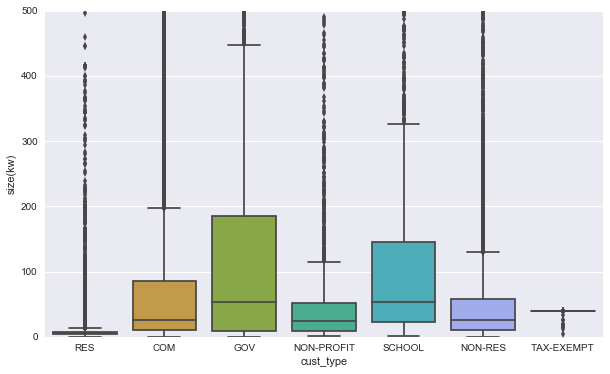

In [39]:
# adjust vertical scale
sns.boxplot(x='cust_type', y='size_kw', data=dfLive)
plt.ylim(0, 500)
plt.ylabel('size(kw)')
plt.show()

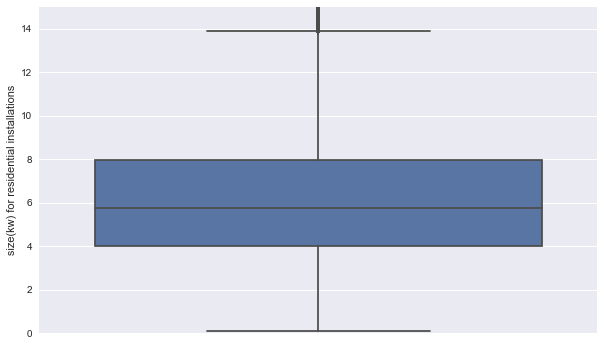

In [40]:
# let's look at residential only
sns.boxplot(y='size_kw', data=dfLive[dfLive.cust_type == "RES"])
plt.ylim(0, 15)
plt.ylabel('size(kw) for residential installations')
plt.show()

In [42]:
dfLive.to_csv('../local/data/LBNL_openpv_tts_data/ttsclean20180123.csv', encoding='utf-8')

__got rid of extremely high cost/watt (and associated bogus size/price pairs) but I didn't look at installs where the cost/watt is too low to be credible.  Do that now.__

In [44]:
(dfLive.cost_per_watt < 0.1).sum()

5984

In [48]:
(dfLive.cost_per_watt < 1.0).sum()

9378

In [49]:
dfLive[(dfLive.cost_per_watt < 1.0)].to_csv('lessthanabuck.csv')

__I looked at them.  Yes, they are bogus, many with price of $1.00 or $0.01.  Others are just too inexpensive to be believed.

In [50]:
dfLive[(dfLive.cost_per_watt < 1.0)].cost_per_watt.describe()

count    9.378000e+03
mean     2.105507e-01
std      3.223237e-01
min      2.184503e-09
25%      1.392426e-04
50%      2.600439e-04
75%      3.630718e-01
max      9.998888e-01
Name: cost_per_watt, dtype: float64

In [52]:
dfLive.drop(dfLive[(dfLive.cost_per_watt < 1.0)].index, inplace=True)

In [53]:
(dfLive.cost_per_watt < 1.0).sum()

0

In [54]:
dfLive.to_csv('../local/data/LBNL_openpv_tts_data/ttsclean20180123.csv', encoding='utf-8')